#Основные понятия  
Основные понятия, касающиеся использования алгоритмов оптимизации для улучшения качества модели в машинном обучении, включают следующие аспекты:

1. Функции потерь (Loss Functions): описывают, насколько хорошо модель предсказывает данные. Различные задачи требуют использования соответствующих функций потерь, например, среднеквадратичная ошибка (Mean Squared Error, MSE) для регрессии и кросс-энтропия для классификации.

2. Алгоритмы оптимизации: методы, используемые для минимизации функции потерь, адаптируя параметры модели. Сюда входят, например, градиентный спуск, стохастический градиентный спуск (SGD), Adam и RMSprop.

3. Скорость обучения (Learning Rate): ключевой гиперпараметр в процессе обучения, который контролирует, насколько сильно мы адаптируем наши веса в ответ на оценку потерь на каждом шаге. Слишком высокая скорость обучения может привести к расходимости, слишком низкая — к замедлению обучения.

##Задание 1

Загрузите датасет и проведите первичный анализ данных. Сделайте выводы и проверьте наблюдается ли дисбаланс классов в нашем наборе данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import time
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [2]:
df = pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Выполните базовый анализ данных: вывод размера выборки, проверка на пропущенные значения, статистический анализ числовых переменных.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df = df.drop('Unnamed: 32', axis=1)

In [5]:
print("Количество пропущенных значений:")
print(df.isnull().sum())

Количество пропущенных значений:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
duplicates = df.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool


In [7]:
duplicates.sum()

0

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


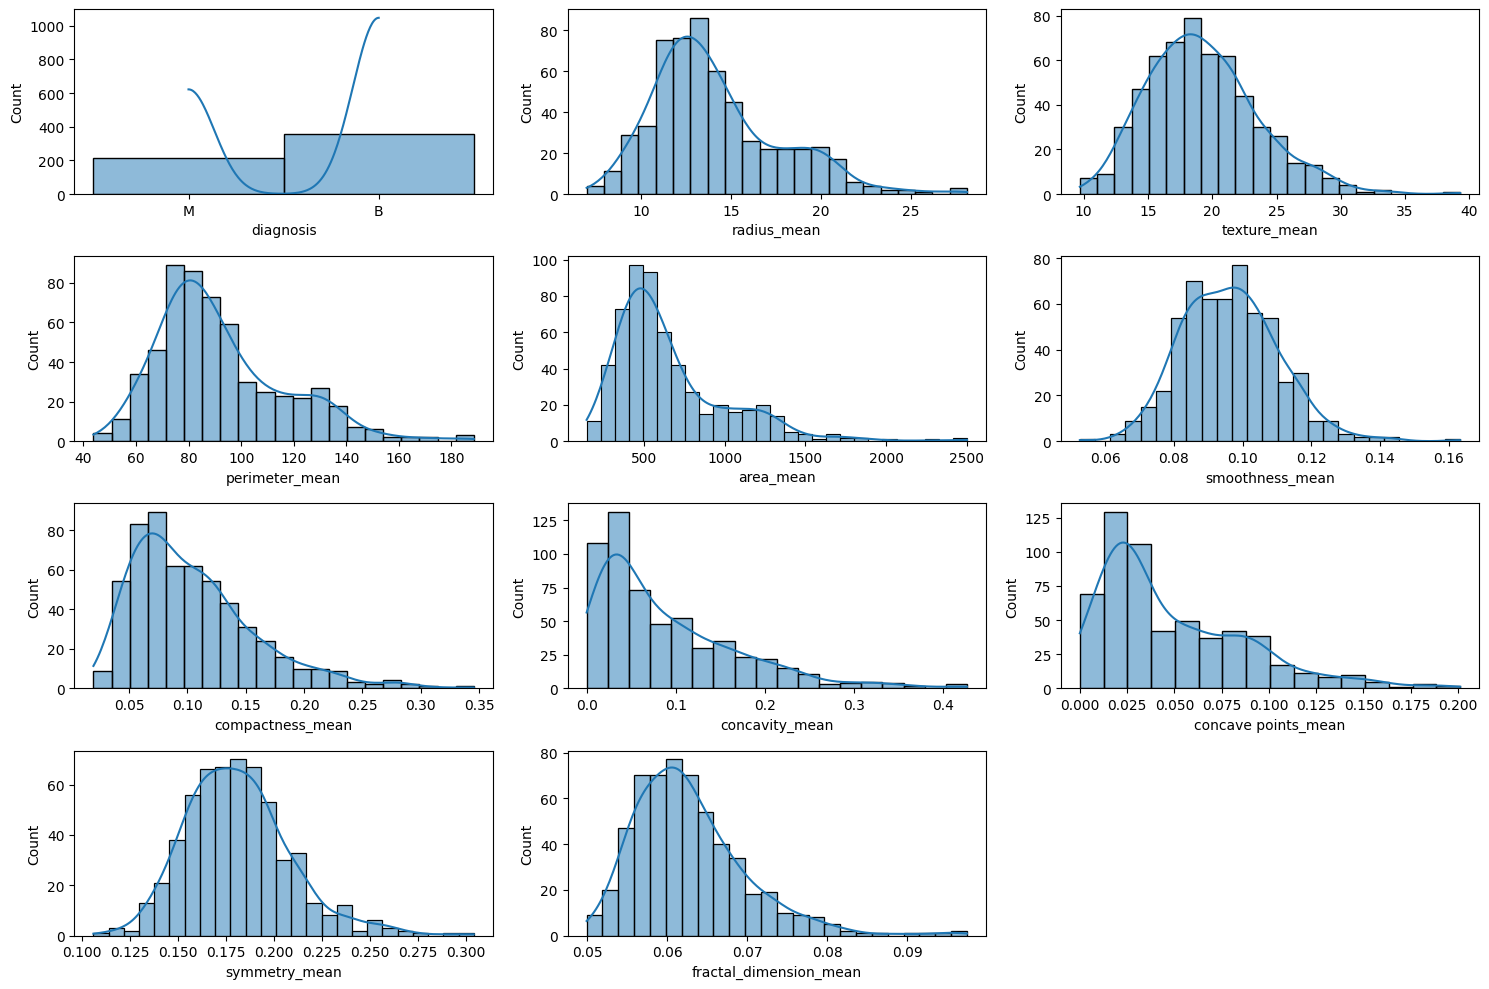

In [10]:
# Визуализация гистограмм
plt.figure(figsize=(15, 10))
for i, column in enumerate(['diagnosis', 'radius_mean', 'texture_mean',
                   'perimeter_mean','area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                            'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

In [11]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [12]:
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [13]:
df['diagnosis'].unique()

array([1, 0])

In [14]:
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


Стандартизируем наши данные и раздели на обучающую и тестовую выборки

In [15]:
X = df.drop('diagnosis', axis=1)
Y = df['diagnosis']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((455, 31), (114, 31))

In [17]:
# Список значений C
C_values = [0.01, 0.1, 1, 10, 100]

In [18]:
# Обучение моделей и оценка качества
results = []
for C in C_values:
    # Обучение модели
    start_time = time.time()
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    # Расчет метрик качества
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Запись результатов
    results.append({'C': C, 'Accuracy': accuracy, 'Recall': recall,
                    'Precision': precision, 'F1-score': f1, 'Training Time': training_time})

In [19]:
df_1 = pd.DataFrame(results)
df_1

,C,Accuracy,Recall,Precision,F1-score,Training Time
0,0.01,0.964912,0.906977,1.000000,0.951220,0.068364
1,0.10,0.982456,0.953488,1.000000,0.976190,0.015602
2,1.00,0.973684,0.953488,0.976190,0.964706,0.073587
3,10.00,0.973684,0.976744,0.954545,0.965517,0.099382
4,100.00,0.938596,0.976744,0.875000,0.923077,0.098110


При значениеии С = 0.1 точность и Recall максимальны. Дальнейшее увеличение параметра С ухудшает результаты

In [20]:
# Обучение модели логистической регрессии с SGD
model_sgd = LogisticRegression(solver="sag", random_state=42)
model_sgd.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=42, solver='sag')

In [21]:
# Обучение модели логистической регрессии с стандартным градиентным спуском
model_gd = LogisticRegression(solver="lbfgs", random_state=42)
model_gd.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [22]:
# Предсказание
y_pred_sgd = model_sgd.predict(X_test)
y_pred_gd = model_gd.predict(X_test)

In [23]:
# Оценка качества
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

In [24]:
print(f"Точность SGD: {accuracy_sgd}")
print(f"Точность стандартного градиентного спуска: {accuracy_gd}")

Точность SGD: 0.9824561403508771
Точность стандартного градиентного спуска: 0.9736842105263158


In [25]:
class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=100, learn_method='gd', stop_rate=0.001):
        self.epoch = epoch
        self.learn_method = learn_method
        self.learning_rate = learning_rate
        self.stop_rate = stop_rate

        self.weights = None
        self.epoch_passed = 0
        self.learn_time = 0

        # Выбор метода обучения
        if self.learn_method == 'gd':
            self.learn_func = self.learn_gd
        elif self.learn_method == 'rmsprop':
            self.learn_func = self.learn_rmsprop
        elif self.learn_method == 'adam':
            self.learn_func = self.learn_adam
        elif self.learn_method == 'nadam':
            self.learn_func = self.learn_nadam
        else:
            raise Exception('Unknown learning method: {}'.format(self.learn_method))

    def init_weights(self, X):
        # Инициализация весов нулями
        return np.zeros((X.shape[1], 1))

    def fit(self, X, Y):
        # Убедимся, что X и Y являются массивами NumPy
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values.reshape(-1, 1)  # Преобразование Y в правильную форму

        X = self.add_ones(X)
        W = self.init_weights(X)

        start = time.perf_counter()
        self.learn_func(X, Y, W)
        self.learn_time = time.perf_counter() - start

    def score(self, X, Y):
        predictions = self.predict(X)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y, pd.Series):
            Y = Y.values.ravel()
        correct_predictions = (predictions == Y).sum()
        return correct_predictions / len(Y)


    def n_iter(self):
        return self.epoch_passed

    def time(self):
        return self.learn_time

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = self.add_ones(X)
        return self.sigmoid_linear_regression(X, self.weights)

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def learn_gd(self, X, Y, W):
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            W -= self.learning_rate * gradients
            self.epoch_passed += 1

        self.weights = W


    def learn_rmsprop(self, X, Y, W):
        cached_rmsprop = np.zeros_like(W)
        decay_rate = 0.9
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            cached_rmsprop = decay_rate * cached_rmsprop + (1 - decay_rate) * gradients ** 2
            W -= (self.learning_rate * gradients) / (np.sqrt(cached_rmsprop) + 1e-6)
            self.epoch_passed += 1

        self.weights = W
    def learn_adam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)
            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)

            W -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W

    def learn_nadam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)

            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)
            m_hat = beta1 * m_corrected + (1 - beta1) * gradients / (1 - beta1 ** t)

            W -= self.learning_rate * m_hat / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W


    def cost_binary_cross_entropy(self, X, Y, W):
        m = X.shape[0]
        h = self.sigmoid_linear_regression(X, W)
        return -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X, W) - Y)

    def sigmoid_linear_regression(self, X, W):
        return 1 / (1 + np.exp(-np.dot(X, W)))

In [26]:
results = pd.DataFrame(columns=['Method','Score','Iterations','Time'])

In [27]:
df['diagnosis'] = df['diagnosis'].astype('int', copy = False)

In [28]:
start = time.perf_counter()

# SKLEARN с установками по-умолчанию
my_model = LogisticRegression(max_iter=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter_[0]
my_time = time.perf_counter() - start
print(f"SKLEARN DEFAULT score is: {my_score}")
print(f"SKLEARN DEFAULT iter number: {my_iter}")
print(f"SKLEARN DEFAULT time: {my_time} sec")
results.loc[len(results)] = ['SKLEARN DEFAULT',my_score,my_iter,my_time]

SKLEARN DEFAULT score is: 0.9736842105263158
SKLEARN DEFAULT iter number: 20
SKLEARN DEFAULT time: 0.041502674000014395 sec


In [29]:
my_model = MyLogisticRegression(learn_method='gd',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"GD score is: {my_score}")
print(f"GD iter number: {my_iter}")
print(f"GD time: {my_time} sec")
results.loc[len(results)] = ['MY GD',my_score,my_iter,my_time]

<ipython-input-25-2094d9c6a364>:144: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


GD score is: 59.21052631578947
GD iter number: 2000
GD time: 0.6883868759999814 sec


In [30]:
# NADAM
my_model = MyLogisticRegression(learn_method='nadam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"NADAM score is: {my_score}")
print(f"NADAM iter number: {my_iter}")
print(f"NADAM time: {my_time} sec")
results.loc[len(results)] = ['MY NADAM',my_score,my_iter,my_time]

<ipython-input-25-2094d9c6a364>:144: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


NADAM score is: 59.21052631578947
NADAM iter number: 2000
NADAM time: 0.7666836920000151 sec


In [31]:
# RMSPROP

my_model = MyLogisticRegression(learn_method='rmsprop',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"RMSPROP score is: {my_score}")
print(f"RMSPROP iter number: {my_iter}")
print(f"RMSPROP time: {my_time} sec")
results.loc[len(results)] = ['MY RMSPROP',my_score,my_iter,my_time]

<ipython-input-25-2094d9c6a364>:144: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


RMSPROP score is: 59.21052631578947
RMSPROP iter number: 2000
RMSPROP time: 0.9627667819999886 sec


In [32]:
results

,Method,Score,Iterations,Time
0,SKLEARN DEFAULT,0.973684,20,0.041503
1,MY GD,59.210526,2000,0.688387
2,MY NADAM,59.210526,2000,0.766684
3,MY RMSPROP,59.210526,2000,0.962767


In [33]:
# Обучение моделей и оценка качества
results = []
for C in C_values:
    # Обучение модели
    start_time = time.time()
    model = LogisticRegression(C=C)
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Прогнозирование на тестовой выборке
    y_pred = model.predict(X_test)

    # Расчет метрик качества
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Запись результатов
    results.append({'C': C, 'Accuracy': accuracy, 'Recall': recall,
                    'Precision': precision, 'F1-score': f1, 'Training Time': training_time})

##Задание 2

Реализация логистической регрессии с использованием numpy:
Реализация класса логистической регрессии, используя SGD:
1. Оформите код логистической регрессии в виде класса `LogisticRegression`, включающего в себя методы для обучения модели и предсказания меток классов.
2. Метод `fit` должен обучать модель, принимая на вход обучающие данные и параметры обучения.
3. Метод `predict` должен использовать обученные веса модели для вычисления и возвращения предсказанных меток классов для нового набора данных. Также метод `score` для проверки качества модели
4. Дополнительно реализуйте метод `predict_proba`, который будет возвращать вероятности классов для новых данных на основе обученных весов.
5. Обучите свою модели и сравните результаты с `LogisticRegression` из `sklearn`

In [34]:
import numpy as np
import time

class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=0.05, learn_method='sgd', stop_rate=0.0001):
        self.epoch = epoch  # количество итераций
        self.learn_method = learn_method  # тип метода обучения
        self.learning_rate = learning_rate  # шаг обучения
        self.stop_rate = stop_rate  # параметр остановки
        self.weights = None  # веса модели

    def fit(self, X, Y):
        X = self.add_ones(X)
        Y = np.reshape(Y, (len(Y), 1))
        self.weights = np.zeros((X.shape[1], 1))

        # Выбор метода обучения
        if self.learn_method == 'sgd':
            self.learn_sgd(X, Y)

    def learn_sgd(self, X, Y):
        for _ in range(self.epoch):
            idx = np.random.randint(0, X.shape[0])
            X_i = X[idx].reshape(1, -1)
            Y_i = Y[idx].reshape(1, -1)
            preds = self.sigmoid(np.dot(X_i, self.weights))
            self.weights -= self.learning_rate * np.dot(X_i.T, (preds - Y_i))

    def predict(self, X):
        # Добавление единицы для учета bias на этапе предсказания, если нужно
        X = self.add_ones(X)
        # Применение модели
        probs = self.sigmoid(np.dot(X, self.weights))
        return [1 if i > 0.5 else 0 for i in probs]

    def predict_proba(self, X):
        X = self.add_ones(X)
        return self.sigmoid(np.dot(X, self.weights))

    def add_ones(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def score(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)



In [35]:
mlg = MyLogisticRegression()
mlg.fit(X_train, y_train)
pred = mlg.predict(X_test)
mlg.score(X_test, y_test)

0.9824561403508771

##Задание 3

 - Реализуйте модификации градиентного спуска, такие как RMSPROP, ADAM, NADAM. Обучите логистическую регрессию этими методами. Посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов. Сравните время обучения и полученные результаты.
- Добавьте в класс возможность подсчитать время обучения и количество интераций
 - Методы добавьте в уже имеющийся класс.

RMSPROP
\begin{align}
    G_{k+1} &= \gamma G_k + (1 - \gamma)(\nabla f(x_k))^2 \\
    x_{k+1} &= x_k - \frac{\alpha}{\sqrt{G_{k+1} + \varepsilon}} \nabla f(x_k).
\end{align}


ADAM
\begin{align}
    v_{k+1} &= \beta_1 v_k + (1 - \beta_1) \nabla f(x_k) \\
    G_{k+1} &= \beta_2 G_k + (1 - \beta_2)(\nabla f(x_k))^2 \\
    x_{k+1} &= x_k - \frac{\alpha}{\sqrt{G_{k+1} + \varepsilon}} v_{k+1}.
\end{align}

NADAM
 $$\theta_{t+1} = \theta_{t} - \frac{\eta}{\sqrt{\hat{v}_{t}}+\epsilon}\left(\beta_{1}\hat{m}_{t} + \frac{(1-\beta_{t})g_{t}}{1-\beta^{t}_{1}}\right)$$

In [36]:
import numpy as np
import pandas as pd
import time

class MyLogisticRegression:
    def __init__(self, epoch=1000, learning_rate=100, learn_method='gd', stop_rate=0.001):
        self.epoch = epoch
        self.learn_method = learn_method
        self.learning_rate = learning_rate
        self.stop_rate = stop_rate

        self.weights = None
        self.epoch_passed = 0
        self.learn_time = 0

        # Выбор метода обучения
        if self.learn_method == 'gd':
            self.learn_func = self.learn_gd
        elif self.learn_method == 'rmsprop':
            self.learn_func = self.learn_rmsprop
        elif self.learn_method == 'adam':
            self.learn_func = self.learn_adam
        elif self.learn_method == 'nadam':
            self.learn_func = self.learn_nadam
        else:
            raise Exception('Unknown learning method: {}'.format(self.learn_method))

    def init_weights(self, X):
        # Инициализация весов нулями
        return np.zeros((X.shape[1], 1))

    def fit(self, X, Y):
        # Убедимся, что X и Y являются массивами NumPy
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(Y, pd.Series):
            Y = Y.values.reshape(-1, 1)  # Преобразование Y в правильную форму

        X = self.add_ones(X)
        W = self.init_weights(X)

        start = time.perf_counter()
        self.learn_func(X, Y, W)
        self.learn_time = time.perf_counter() - start

    def score(self, X, Y):
        predictions = self.predict(X)
        # Если Y — pandas.Series, преобразуем его в numpy массив с помощью .values и используем .ravel() для приведения к одномерному виду
        if isinstance(Y, pd.Series):
            Y = Y.values.ravel()
        correct_predictions = (predictions == Y).sum()
        return correct_predictions / len(Y)


    def n_iter(self):
        return self.epoch_passed

    def time(self):
        return self.learn_time

    def predict_proba(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.values
        X = self.add_ones(X)
        return self.sigmoid_linear_regression(X, self.weights)

    def predict(self, X):
        probas = self.predict_proba(X)
        return (probas > 0.5).astype(int)

    def add_ones(self, X):
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def learn_gd(self, X, Y, W):
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            W -= self.learning_rate * gradients
            self.epoch_passed += 1

        self.weights = W


    def learn_rmsprop(self, X, Y, W):
        cached_rmsprop = np.zeros_like(W)
        decay_rate = 0.9
        for _ in range(self.epoch):
            gradients = self.gradient(X, Y, W)
            cached_rmsprop = decay_rate * cached_rmsprop + (1 - decay_rate) * gradients ** 2
            W -= (self.learning_rate * gradients) / (np.sqrt(cached_rmsprop) + 1e-6)
            self.epoch_passed += 1

        self.weights = W
    def learn_adam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)
            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)

            W -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W

    def learn_nadam(self, X, Y, W):
        m = np.zeros_like(W)
        v = np.zeros_like(W)
        t = 0
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-8

        for epoch in range(self.epoch):
            t += 1
            gradients = self.gradient(X, Y, W)
            m = beta1 * m + (1 - beta1) * gradients
            v = beta2 * v + (1 - beta2) * (gradients ** 2)

            m_corrected = m / (1 - beta1 ** t)
            v_corrected = v / (1 - beta2 ** t)
            m_hat = beta1 * m_corrected + (1 - beta1) * gradients / (1 - beta1 ** t)

            W -= self.learning_rate * m_hat / (np.sqrt(v_corrected) + epsilon)
            self.epoch_passed = epoch + 1

        self.weights = W


    def cost_binary_cross_entropy(self, X, Y, W):
        m = X.shape[0]
        h = self.sigmoid_linear_regression(X, W)
        return -(1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))

    def gradient(self, X, Y, W):
        m = X.shape[0]
        return (1 / m) * np.dot(X.T, self.sigmoid_linear_regression(X, W) - Y)

    def sigmoid_linear_regression(self, X, W):
        return 1 / (1 + np.exp(-np.dot(X, W)))



In [37]:
results = pd.DataFrame(columns=['Method','Score','Iterations','Time'])

In [38]:
from sklearn.linear_model import LogisticRegression

start = time.perf_counter()

# SKLEARN с установками по-умолчанию
my_model = LogisticRegression(max_iter=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter_[0]
my_time = time.perf_counter() - start
print(f"SKLEARN DEFAULT score is: {my_score}")
print(f"SKLEARN DEFAULT iter number: {my_iter}")
print(f"SKLEARN DEFAULT time: {my_time} sec")
results.loc[len(results)] = ['SKLEARN DEFAULT',my_score,my_iter,my_time]

SKLEARN DEFAULT score is: 0.9736842105263158
SKLEARN DEFAULT iter number: 20
SKLEARN DEFAULT time: 0.047252919000015936 sec


In [39]:
my_model = MyLogisticRegression(learn_method='gd',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"GD score is: {my_score}")
print(f"GD iter number: {my_iter}")
print(f"GD time: {my_time} sec")
results.loc[len(results)] = ['MY GD',my_score,my_iter,my_time]

<ipython-input-36-2d25c7787032>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


GD score is: 59.21052631578947
GD iter number: 2000
GD time: 0.5718947469999875 sec


In [40]:
my_model = MyLogisticRegression(learn_method='rmsprop',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"RMSPROP score is: {my_score}")
print(f"RMSPROP iter number: {my_iter}")
print(f"RMSPROP time: {my_time} sec")
results.loc[len(results)] = ['MY RMSPROP',my_score,my_iter,my_time]

<ipython-input-36-2d25c7787032>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


RMSPROP score is: 59.21052631578947
RMSPROP iter number: 2000
RMSPROP time: 0.4904904040000133 sec


In [41]:
# ADAM
my_model = MyLogisticRegression(learn_method='adam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"ADAM score is: {my_score}")
print(f"ADAM iter number: {my_iter}")
print(f"ADAM time: {my_time} sec")
results.loc[len(results)] = ['MY ADAM',my_score,my_iter,my_time]

<ipython-input-36-2d25c7787032>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


ADAM score is: 58.719298245614034
ADAM iter number: 2000
ADAM time: 0.8144397199999958 sec


In [42]:
# NADAM
my_model = MyLogisticRegression(learn_method='nadam',epoch=2000)
my_model.fit(X_train, y_train)
my_score = my_model.score(X_test, y_test)
my_iter = my_model.n_iter()
my_time = my_model.time()
print(f"NADAM score is: {my_score}")
print(f"NADAM iter number: {my_iter}")
print(f"NADAM time: {my_time} sec")
results.loc[len(results)] = ['MY NADAM',my_score,my_iter,my_time]

<ipython-input-36-2d25c7787032>:148: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(X, W)))


NADAM score is: 59.21052631578947
NADAM iter number: 2000
NADAM time: 0.6685289080000416 sec


In [43]:
results

,Method,Score,Iterations,Time
0,SKLEARN DEFAULT,0.973684,20,0.047253
1,MY GD,59.210526,2000,0.571895
2,MY RMSPROP,59.210526,2000,0.490490
3,MY ADAM,58.719298,2000,0.814440
4,MY NADAM,59.210526,2000,0.668529


##Домашнее задание

Задание
1. Используйте Cancer_Data для классификации. Обучите модель логистической регрессии с разными значениями скорости обучения (с разными значениями параметра C, который является обратным значением скорости обучения).
Запишите и сравните результаты метрик качества и скорости сходимости модели.

2. Познакомиться с работой стохастического градиентного спуска.
Используйте набор данных для обучения модели с использованием стохастического градиентного спуска (SGD - модель SGDClassifier библиотека sklearn https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html). Сравните скорость сходимости и итоговое качество модели со стандартным градиентным спуском (используйте логистическую регрессию).

3. Сравнить разные алгоритмы оптимизации.
- Обучитe модель логистической регрессии на этих данных, используя разные оптимизаторы, и сравните их эффективность.
Используйте параметр `solver`, который может принимать значения:
  - 'liblinear': использует координатный спуск (Coordinate Descent, CD). Хорошо подходит для небольших датасетов.
  - 'lbfgs': аппроксимация метода Бройдена – Флетчера – Гольдфарба – Шанно (BFGS). Рекомендуется для небольших и средних датасетов.
  - 'newton-cg': Ньютоновский метод сопряженных градиентов. Требует много ресурсов для больших датасетов из-за необходимости вычисления матрицы Гессе.
  - 'sag': Стохастический градиентный спуск с использованием среднего градиента. Подходит для больших датасетов.
  - 'saga': Расширение 'sag', поддерживает L1-регуляризацию, такое сочетание регуляризаций делает его вариацией метода Elastic Net.